In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount = True )
folder = '/content/gdrive/My Drive/BAI NHOM'

Mounted at /content/gdrive


# Thư viện

In [ ]:
#Thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

from scipy import stats
from scipy.stats                import f_oneway
import statsmodels.api           as sm
from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor



In [ ]:
#dữ liệu Adidas gốc
data = pd.read_excel(folder + '/Adidas US Sales Datasets.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


# Tiền xử lý dữ liệu

## Mô tả dữ liệu

In [ ]:
#loại bỏ unnamed
df = pd.read_excel(folder + '/Adidas US Sales Datasets.xlsx',skiprows=4,usecols = 'B:N')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [ ]:
#kích thước bộ dữ liệu
print(f'Kích thước bộ dữ liệu gồm: {df.shape[0]} dòng và {df.shape[1]} cột (thuộc tính)')

Kích thước bộ dữ liệu gồm: 9648 dòng và 13 cột (thuộc tính)


##Thống kê mô tả

In [ ]:
#mô tả các biến numerical
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [ ]:
 #mô tả các biến categorical
 df.describe(include = 'O')

,Retailer,Region,State,City,Product,Sales Method
count,9648,9648,9648,9648,9648,9648
unique,6,5,50,52,6,3
top,Foot Locker,West,California,Portland,Men's Street Footwear,Online
freq,2637,2448,432,360,1610,4889


## Kiểm tra trùng lặp và missing values

In [ ]:
#kiểm tra trùng lặp
print('số dòng trùng nhau:' , df.duplicated().sum())

số dòng trùng nhau: 0


In [ ]:
#Kiểm tra giá trị rỗng
null_values = df.isnull().sum()
print('Số giá trị rỗng:',null_values)

Số giá trị rỗng: Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [ ]:
df = df.drop('Retailer ID', axis=1)

## Outliers

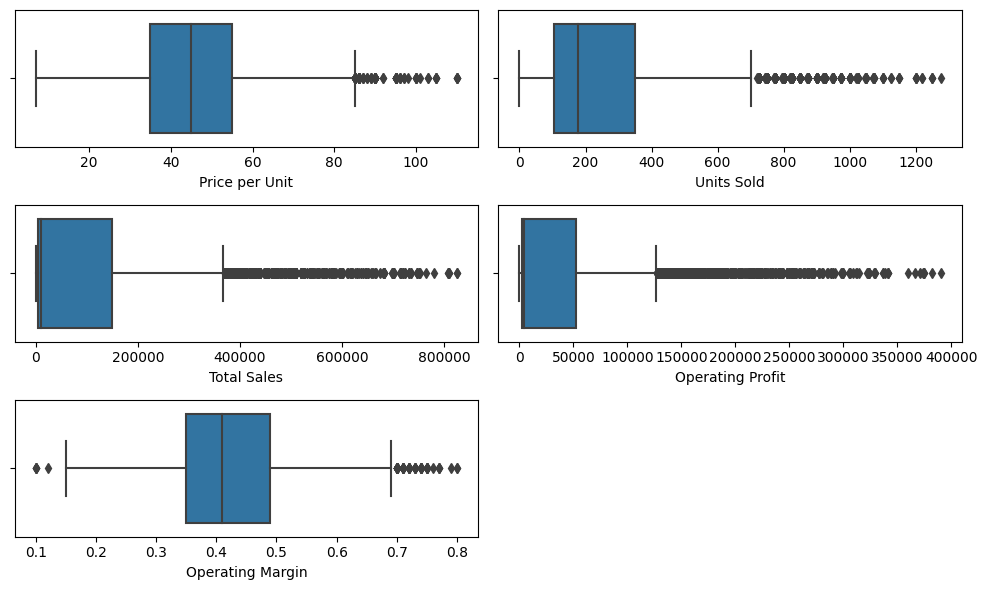

In [ ]:
#BOXPLOT biểu diễn phân phối của các cột numerical

# các cột numerical
numeric_columns = df[["Price per Unit", "Units Sold", "Total Sales", "Operating Profit", "Operating Margin"]]

columns = numeric_columns.columns
total_plots = len(columns)
columns_per_row = 2
rows = -(-total_plots // columns_per_row)

plt.figure(figsize=(10,6))

for idx, column in enumerate(columns, start=1):
    plt.subplot(rows, columns_per_row, idx)
    sns.boxplot(data=numeric_columns, x=column)
    plt.xlabel(column, fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
#truy vấn các dòng có doanh thu =0
df[df['Total Sales'] == 0 ]

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1019,Foot Locker,2021-06-05,Midwest,Nebraska,Omaha,Women's Athletic Footwear,35.0,0,0.0,0.0,0.40,Outlet
1025,Foot Locker,2021-06-11,Midwest,Nebraska,Omaha,Women's Athletic Footwear,30.0,0,0.0,0.0,0.40,Outlet
4907,Foot Locker,2021-06-05,Midwest,Nebraska,Omaha,Women's Athletic Footwear,33.0,0,0.0,0.0,0.55,Online
4913,Foot Locker,2021-06-11,Midwest,Nebraska,Omaha,Women's Athletic Footwear,27.0,0,0.0,0.0,0.53,Online


In [ ]:
## xóa những hàng có doanh thu =0 vì vô nghĩa
df = df.drop(df[df['Total Sales'] == 0].index)

In [ ]:
#xử lí outliers
numeric_columns = ['Price per Unit','Units Sold']
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

df= df[~((df[numeric_columns] < lower_threshold) | (df[numeric_columns] > upper_threshold)).any(axis=1)]

In [ ]:
# Xử lí outliers
def find_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

#tạo lớp để clip các outliers về khoảng min, max
class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

df['Total Sales'] = OutlierClipper().fit_transform(df['Total Sales'])
df['Operating Profit'] = OutlierClipper().fit_transform(df['Operating Profit'])
df['Operating Margin'] = OutlierClipper().fit_transform(df['Operating Margin'])


In [ ]:
#Kích thước dữ liệu sau khi xử lí
df.shape

(9048, 12)

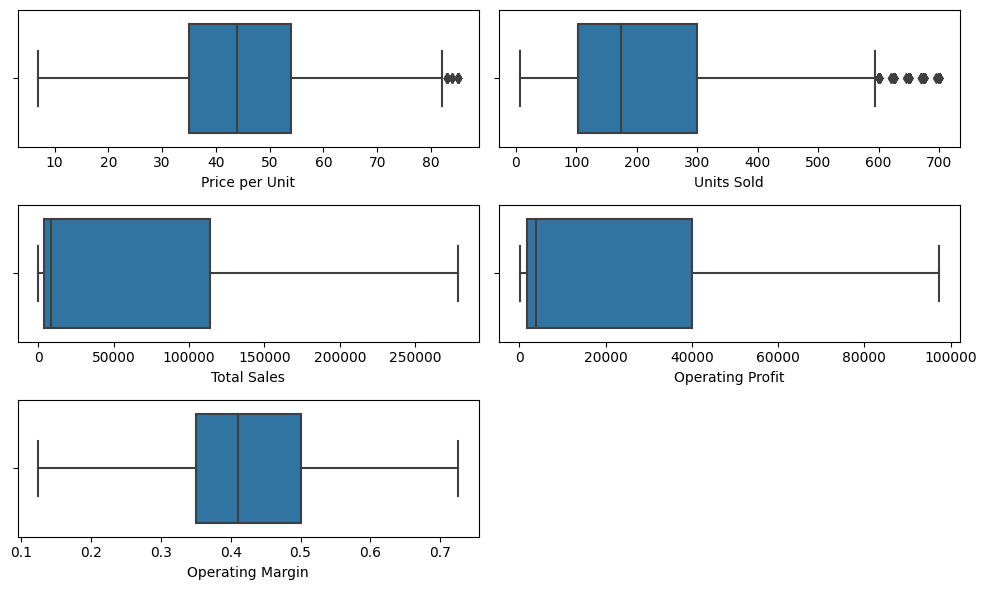

In [ ]:
#vẽ lại boxplot sau khi xử lí outliers
numeric_columns = df[["Price per Unit", "Units Sold", "Total Sales", "Operating Profit", "Operating Margin"]]

columns = numeric_columns.columns
total_plots = len(columns)
columns_per_row = 2
rows = -(-total_plots // columns_per_row)

plt.figure(figsize=(10,6))

for idx, column in enumerate(columns, start=1):
    plt.subplot(rows, columns_per_row, idx)
    sns.boxplot(data=numeric_columns, x=column)
    plt.xlabel(column, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
adidas= df
adidas

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
70,Sports Direct,2020-07-21,Northeast,New York,New York,Women's Street Footwear,35.0,700,245000.0,85750.00,0.35,Outlet
71,Sports Direct,2020-07-22,Northeast,New York,New York,Women's Athletic Footwear,35.0,700,245000.0,97275.52,0.45,Outlet
72,Sports Direct,2020-07-23,South,Texas,Houston,Men's Apparel,40.0,550,220000.0,66000.00,0.30,Outlet
73,Sports Direct,2020-07-24,South,Texas,Houston,Women's Apparel,35.0,700,245000.0,97275.52,0.50,Outlet
76,Sports Direct,2020-07-27,South,Texas,Houston,Women's Street Footwear,35.0,675,236250.0,82687.50,0.35,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


## Thêm cột và chuyển kiểu dữ liệu

In [ ]:
#Tạo thêm thuộc tính
#Month & Year
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'])
adidas['Month']=adidas['Invoice Date'].dt.month
adidas['Year']=adidas['Invoice Date'].dt.year
adidas=adidas.drop('Invoice Date', axis =1)
#Gender & Product
adidas['Gender'] = adidas['Product'].str.split("'s").str[0]
adidas['Product1'] = adidas['Product'].str.split("'s").str[1]
adidas=adidas.drop('Product',axis =1)
#Df gender
df_men=adidas[adidas['Gender']=='Men']
df_women=adidas[adidas['Gender']=='Women']
adidas.head()

,Retailer,Region,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year,Gender,Product1
70,Sports Direct,Northeast,New York,New York,35.0,700,245000.0,85750.00,0.35,Outlet,7,2020,Women,Street Footwear
71,Sports Direct,Northeast,New York,New York,35.0,700,245000.0,97275.52,0.45,Outlet,7,2020,Women,Athletic Footwear
72,Sports Direct,South,Texas,Houston,40.0,550,220000.0,66000.00,0.30,Outlet,7,2020,Men,Apparel
73,Sports Direct,South,Texas,Houston,35.0,700,245000.0,97275.52,0.50,Outlet,7,2020,Women,Apparel
76,Sports Direct,South,Texas,Houston,35.0,675,236250.0,82687.50,0.35,Outlet,7,2020,Women,Street Footwear


In [ ]:
#Chuyển kiểu dữ liệu
adidas['Month']=adidas['Month'].astype(object)
adidas['Year']=adidas['Year'].astype(object)

In [ ]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 70 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9048 non-null   object 
 1   Region            9048 non-null   object 
 2   State             9048 non-null   object 
 3   City              9048 non-null   object 
 4   Price per Unit    9048 non-null   float64
 5   Units Sold        9048 non-null   int64  
 6   Total Sales       9048 non-null   float64
 7   Operating Profit  9048 non-null   float64
 8   Operating Margin  9048 non-null   float64
 9   Sales Method      9048 non-null   object 
 10  Month             9048 non-null   object 
 11  Year              9048 non-null   object 
 12  Gender            9048 non-null   object 
 13  Product1          9048 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1.0+ MB


# Phân tích và Trực quan dữ liệu

## Phân tích đơn biến

#### 1. Heat map thể hiện tương quan giữa các biến

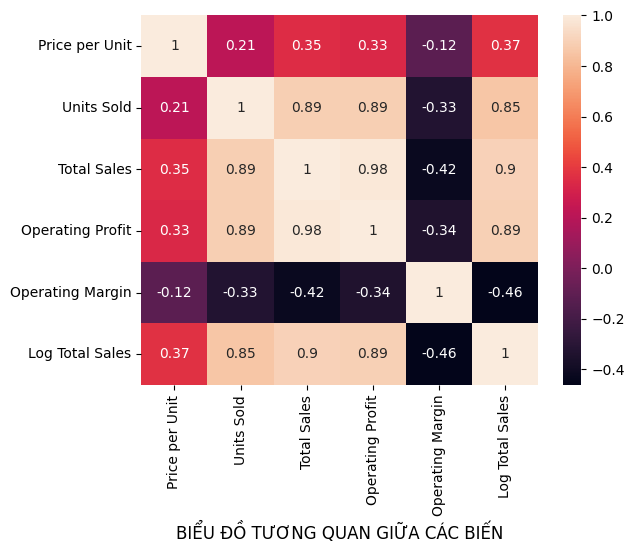

In [ ]:
#sự tương quan giữa các biến
correlate_matrix = adidas.corr()
sns.heatmap(correlate_matrix,annot=True)
plt.xlabel('BIỂU ĐỒ TƯƠNG QUAN GIỮA CÁC BIẾN', size = 12)
plt.show()

- Operating Margin có mối quan hệ nghịch chiều với các biến Price per Unit, Units Sold, Operating Profit.
-> Giải thích: Do một số sản phẩm có giá bán cao nhưng lợi nhuận thấp (chi phí cao).

Unit Sold và Operating Profit:
* Có mối quan hệ đồng biến với Total Sales.
-> Giải thích: Bán nhiều sản phẩm dẫn đến tăng doanh thu và lợi nhuận hoạt động.


#### 2. Biểu diễn biến categorical

Text(0, 0.5, 'Count')

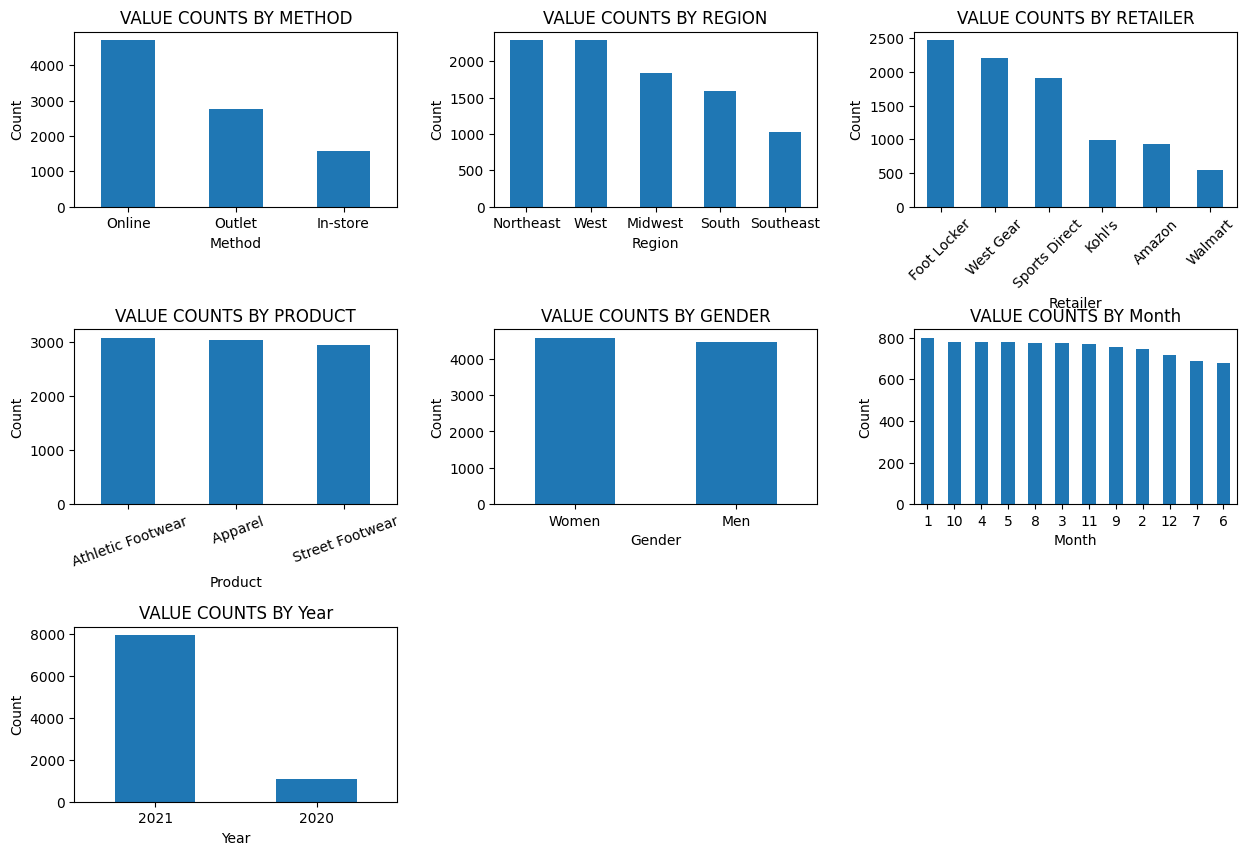

In [ ]:
#biểu diễn các biến định danh

plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.7, wspace = 0.3)
#method
plt.subplot(3,3,1)
label=adidas['Sales Method'].unique()
method_count=adidas['Sales Method'].value_counts()
method_count.plot.bar(label,method_count)
plt.title('VALUE COUNTS BY METHOD')
plt.xlabel('Method')
plt.xticks(rotation=0)
plt.ylabel('Count')

#region
plt.subplot(3,3,2)
label1=adidas['Region'].unique()
region_count=adidas['Region'].value_counts()
region_count.plot.bar(label1,region_count)
plt.title('VALUE COUNTS BY REGION')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.ylabel('Count')

#retailer
plt.subplot(3,3,3)
label2=adidas['Retailer'].unique()
Retailer_count=adidas['Retailer'].value_counts()
Retailer_count.plot.bar(label2,Retailer_count)
plt.title('VALUE COUNTS BY RETAILER')
plt.xlabel('Retailer')
plt.xticks(rotation=45)
plt.ylabel('Count')

#Product
plt.subplot(3,3,4)
label3=adidas['Product1'].unique()
Product_count=adidas['Product1'].value_counts()

Product_count.plot.bar(label3, Product_count)
plt.title('VALUE COUNTS BY PRODUCT')
plt.xlabel('Product')
plt.xticks(rotation=20)
plt.ylabel('Count')

# Gender
plt.subplot(3,3,5)
label5=adidas['Gender'].unique()
gender_count=adidas['Gender'].value_counts()
gender_count.plot.bar(label2,gender_count)
plt.title('VALUE COUNTS BY GENDER')
plt.xticks(rotation= 0)
plt.xlabel('Gender')
plt.ylabel('Count')

# Month
plt.subplot(3,3,6)
label6=adidas['Month'].unique()
Month_count=adidas['Month'].value_counts()
Month_count.plot.bar(label6,Month_count)
plt.title('VALUE COUNTS BY Month')
plt.xticks(rotation= 0)
plt.xlabel('Month')
plt.ylabel('Count')

#Year
plt.subplot(3,3,7)
label7=adidas['Year'].unique()
year_count=adidas['Year'].value_counts()
year_count.plot.bar(label7,year_count)
plt.title('VALUE COUNTS BY Year')
plt.xticks(rotation= 0)
plt.xlabel('Year')
plt.ylabel('Count')


Method:
- Bán hàng trực tuyến chiếm ưu thế, thể hiện sự yêu thích mua sắm online của khách hàng.
Khu vực:
Region:
- Miền Tây nước Mỹ có tỷ lệ mua hàng cao nhất do: Nền kinh tế phát triển, khả năng chi tiêu cao, Mật độ dân số dày đặc,...
- Miền Đông Nam có tỷ lệ mua hàng thấp nhất do: nền kinh tế chậm phát triển hơn.
Mật độ dân số thấp

Retailer:
- Foot Locker nhập hàng nhiều nhất, Walmart nhập hàng ít nhất.
- Doanh thu từng nhà bán lẻ cần được phân tích thêm.

Product:
- Athletic Footwear được ưa chuộng nhất.
Street Footwear được ưa chuộng ít nhất.
Do xu hướng thời trang và tính linh hoạt, đa dạng của Athletic Footwear.
Gender:
- Số lượng sản phẩm Nam và Nữ bán ra tương đương nhau.
Year:
- Doanh số 2021 cao hơn nhiều so với 2020 do ảnh hưởng của dịch Covid năm 2020 (thời điểm bùng nổ đại dịch)

#### 3. Biểu diễn biến Target

Text(0, 0.5, 'Frequency')

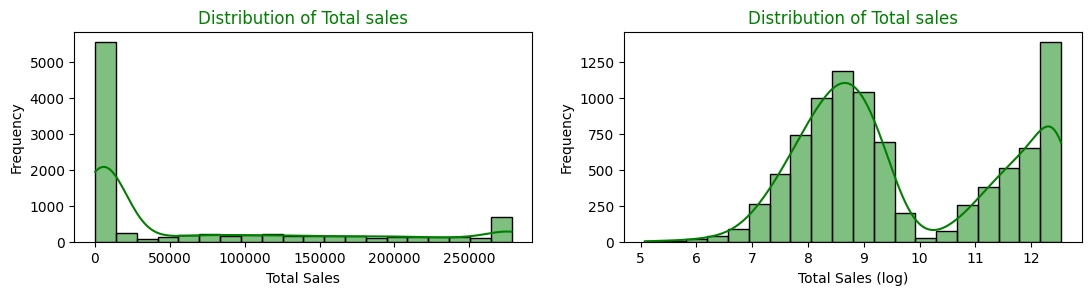

In [ ]:
#biến target
#định lương: biến target
plt.figure(figsize=(13,6))
#phân phối biến target lúc đầu
plt.subplot(2,2,1)
sns.histplot(adidas['Total Sales'], bins = 20, kde = True,color='g',alpha=0.5)
plt.title('Distribution of Total sales',color='g')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')

# dùng logarit để thay đổi phân phối của biến Target
sales=np.log(adidas['Total Sales'])
plt.subplot(2,2,2)
sns.histplot(sales, bins = 20, kde = True,color='g',alpha=0.5)
plt.title('Distribution of Total sales',color='g')
plt.xlabel('Total Sales (log)')
plt.ylabel('Frequency')

Phân phối doanh thu ban đầu:
- Lệch phải do biến động lớn ảnh hưởng đến giá trị trung bình.
Đa phần giá trị tập trung trong khoảng 500-12000 USD.

Phương pháp điều chỉnh:
- Sử dụng hàm logarit để biến đổi phân phối. Giúp thu nhỏ giá trị lớn, mở rộng giá trị nhỏ. Giảm độ chênh lệch, làm phân phối đồng đều và dễ quan sát hơn.

#### 4. Biểu diễn biến Numerical

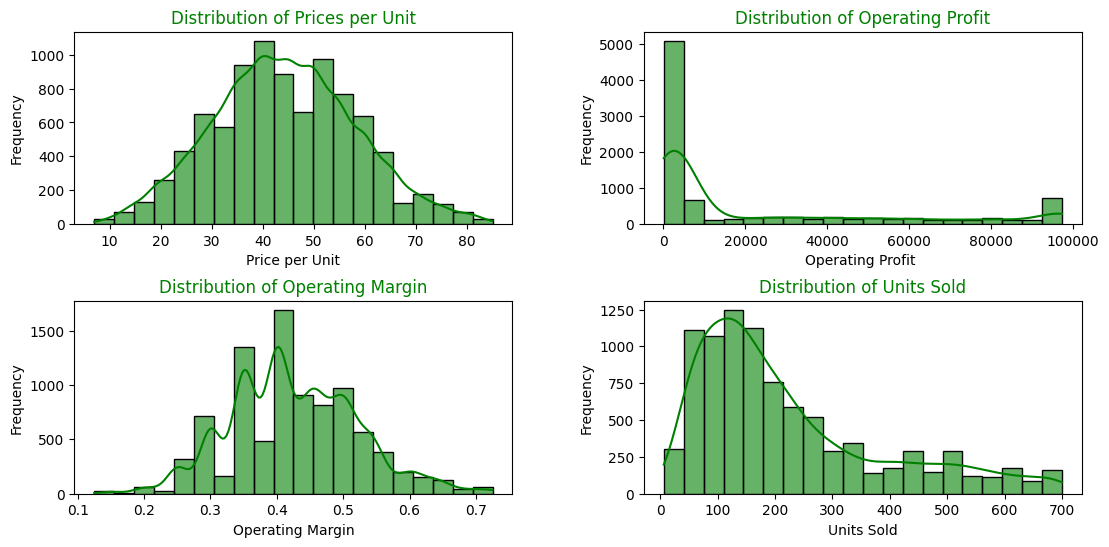

In [ ]:
#biến định lượng
#định lượng
#1b price per product histogram
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(13, 6))
plt.subplots_adjust(wspace=0.3, hspace = 0.4)
#price per units
plt.subplot(2,2,1)
sns.histplot(adidas['Price per Unit'], bins = 20, kde = True,color='g',alpha=0.6)
plt.title('Distribution of Prices per Unit',color='g')
plt.ylabel('Frequency')

#operating profit
profit=np.log(adidas['Operating Profit'])

plt.subplot(2,2,2)
sns.histplot(adidas['Operating Profit'], bins = 20, kde = True,color='g',alpha=0.6)
plt.title('Distribution of Operating Profit',color='g')
plt.xlabel('Operating Profit ')
plt.ylabel('Frequency')

#operating margin
plt.subplot(2,2,3)
sns.histplot(adidas['Operating Margin'], bins = 20, kde = True,color='g',alpha=0.6)
plt.title('Distribution of Operating Margin',color='g')
plt.ylabel('Frequency')

#units sold
plt.subplot(2,2,4)
sns.histplot(adidas['Units Sold'], bins = 20, kde = True,color='g',alpha=0.6)
plt.title('Distribution of Units Sold',color='g')
plt.ylabel('Frequency')


plt.show()

Price per Unit:
- Mức giá phổ biến nhất: 40 USD.
- Giá đa dạng từ 20 đến 80 USD.
- Chiến lược giá linh hoạt, đa dạng sản phẩm, chất lượng.

Operating Profit:
- Tập trung lợi nhuận cao, có giá trị cao hơn mức trung bình.

Operating Margin:
- Biến động cao, phản ánh thị trường đa dạng và chiến lược của Adidas.

Kết luận:

Adidas có chiến lược giá linh hoạt, sản phẩm đa dạng, sức khỏe tài chính tốt tại Mỹ.
Operating Profit và Operating Margin biến động cao do thị trường và chiến lược kinh doanh.

## Phân tích đa biến

#### Doanh thu theo giá và số lượng.

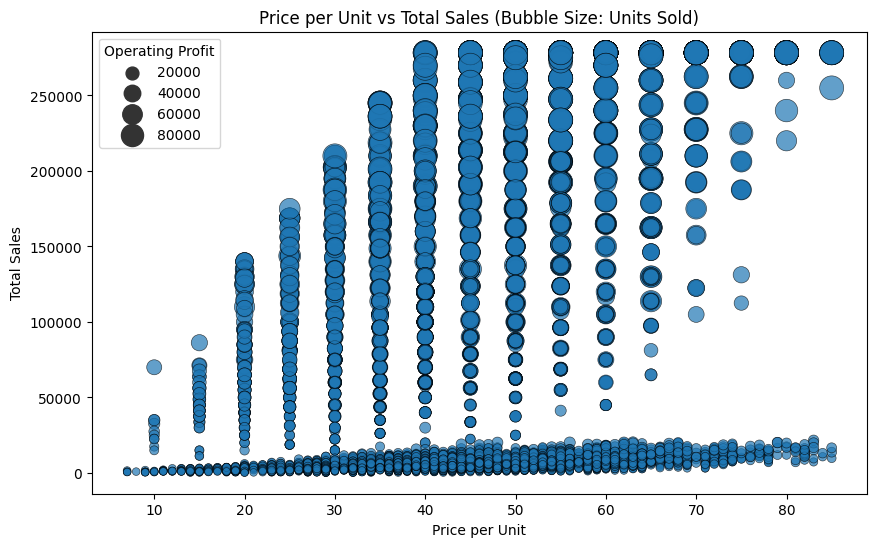

In [ ]:
#phân phối giữa 2 biến numerical
#biến Price per Unit và Total Sales có tác động lẫn nhau như thế nào

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price per Unit',
                y='Total Sales',
                size='Operating Profit', sizes=(30, 300),
                alpha=0.7, edgecolor='black')

plt.title('Price per Unit vs Total Sales (Bubble Size: Units Sold)')
plt.xlabel('Price per Unit')
plt.ylabel('Total Sales')

# vẽ biểu đồ
plt.show()

Số lượng sản phẩm bán ra đa phần nằm trong khoảng giá từ 35 đến 65 đô la, đồng thời cũng tạo ra mức doanh thu lớn, nằm trong khoảng trên 200.000 đô. Đối với những sản phẩm có giá cao hơn 70 đô la, tuy số lượng bán ra không nhiều nhưng lại đem lại doanh thu cao.

####Doanh thu theo biên lợi nhuận.


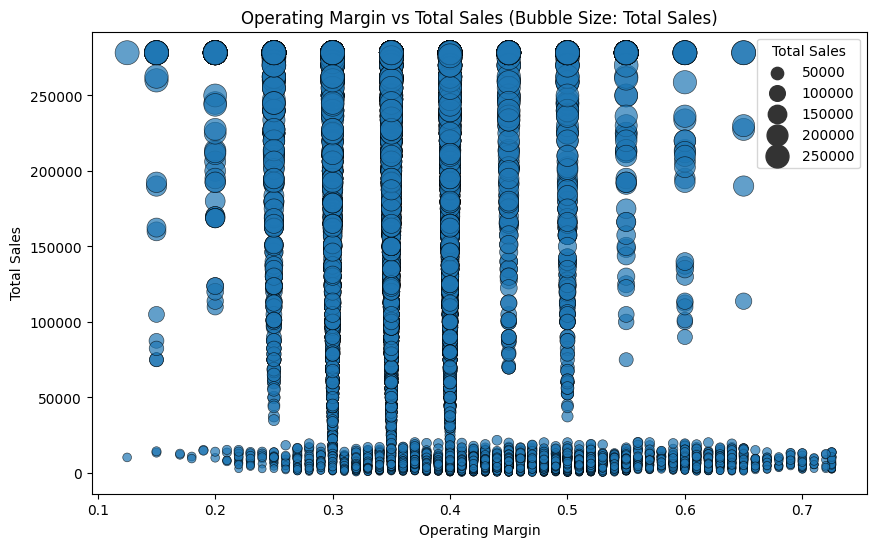

In [ ]:
#biểu đồ scatter plot thể hiện sự tác động giữa doanh thu và biên lợi nhuận
#tạo scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adidas,
                y='Total Sales', x='Operating Margin',
                size='Total Sales', sizes=(30, 300),
                alpha=0.7, edgecolor='black')

plt.title('Operating Margin vs Total Sales (Bubble Size: Total Sales)')
plt.xlabel('Operating Margin')
plt.ylabel('Total Sales')

# vẽ biểu đồ
plt.show()

Biên lợi nhuận của Adidas được phân bố khá đồng đều trên mọi mức doanh thu. Mặc dù con số này chưa thể đưa ra kết luận chắc chắn về mức độ sinh lời của doanh nghiệp, nhưng nó đã tạo ra một cái nhìn tổng quan về cơ cấu lợi nhuận của Adidas.

#### Doanh thu theo sản phẩm.


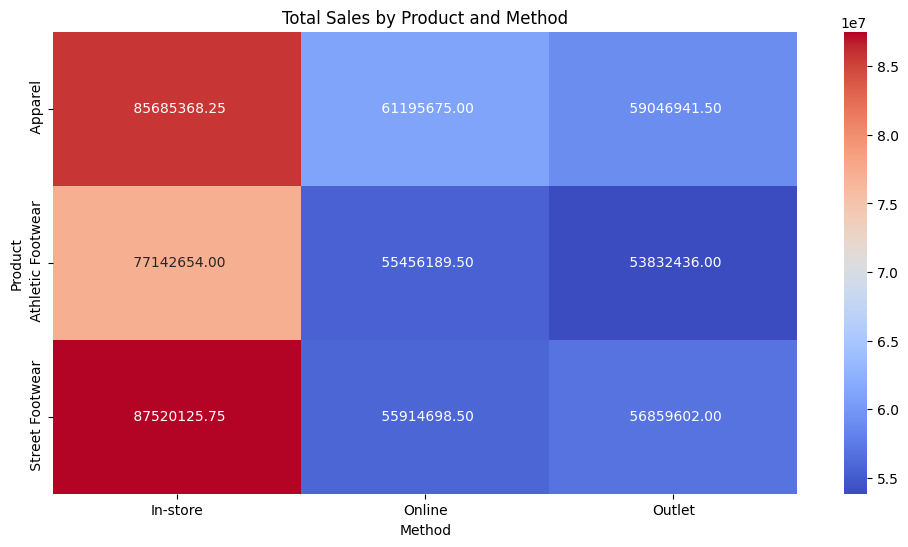

In [ ]:
#total sales by product,method
total_sales = adidas.groupby(['Product1', 'Sales Method'])['Total Sales'].sum().reset_index()
pivot_table = total_sales.pivot(index='Product1', columns='Sales Method', values='Total Sales')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt = ' .2f', cmap='coolwarm')
plt.title('Total Sales by Product and Method', size = 12)
plt.xlabel('Method')
plt.ylabel('Product')
plt.show()

Biểu đồ trên đã cung cấp cái nhìn rõ ràng về hiệu suất của các dòng sản phẩm ở các phương thức bán hàng khác nhau

Dòng sản phẩm:
- Apparel dẫn đầu doanh thu ở cả 3 phương thức. Sự kết hợp giữa tính thời trang và tính thực dụng, đa công năng của dòng sản phẩm này có thể là một yếu tố quan trọng đằng sau sự thu hút của nó đối với đa dạng khách hàng
* Street Footwear có vị trí quan trọng, sức ảnh hưởng nhất định.

Phương thức bán hàng:
- Outlet: Doanh thu thấp nhất, bán sản phẩm tồn kho, giá rẻ.
- Cửa hàng trực tiếp: Chi phí cao, sản phẩm mới, giá cao, phù hợp với sản phẩm Apparel.
- Online: Tiện lợi, đa dạng sản phẩm, giá cả cạnh tranh, phù hợp với sản phẩm Street Footwear.

#### Doanh thu theo giới tính.


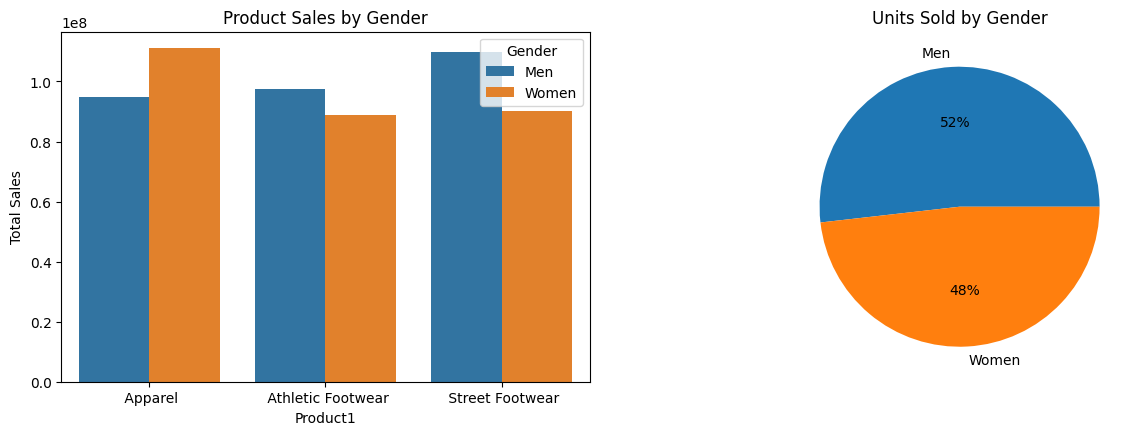

In [ ]:
#số lượng sản phẩm được mua theo giới tính
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df=adidas.groupby(['Gender','Product1'])['Total Sales'].sum().reset_index()
sns.barplot(data=df,x='Product1',y='Total Sales',hue='Gender')
plt.title('Product Sales by Gender')

#tổng Số lượng bán ra dựa trên giới tính
plt.subplot(2,2,2)
gender_sales=adidas.groupby('Gender')['Units Sold'].sum()
plt.pie(gender_sales, labels=gender_sales.index,autopct='%.0f%%')
plt.title('Units Sold by Gender')
plt.show()


Nhìn vào biểu đồ, có thể thấy rằng doanh thu từ dòng sản phẩm Apparel cho nhóm khách hàng nam thấp hơn so với nhóm khách hàng nữ. Ngược lại, đối với dòng sản phẩm Footwear, lại có sự chênh lệch khi nhóm nam đều cao hơn nhóm nữ, có lẽ là do đặc thù sản phẩm. Nhưng từ biểu đồ thể hiện % số lượng sản phẩm bán ra thì giữa nam và nữ không có quá nhiều sự chênh lệch. Đồng thời, tổng quan doanh thu 2 nhóm nam nữ này không có sự khác biệt quá lớn.

In [ ]:
#ý nghĩa của T-test: kiểm tra có sự khác biệt trung bình của biến định lượng đối với mỗi giá trị của biến định tính
alpha            = .05
confidence_level = 1 - alpha
adidas['Log Total Sales']=np.log(adidas['Total Sales'])
df_men=adidas[adidas['Gender']=='Men']['Log Total Sales']
df_women=adidas[adidas['Gender']=='Women']['Log Total Sales']

## So sánh phương sai 2 mẫu dữ liệu
print(f'var(men) = {df_men.var(ddof = 1):.2f}; var(women) = {df_women.var(ddof = 1):.2f}')

#var(man) <> var(women) => equal var= False
#giả thuyết:
#   H0: muy GIỐNG nhau giữa 2 nhóm nam nữ -> không có sự khác biệt trung bình giữa 2 nhóm
#   Ha: muy KHÁC nhau -> có sự khác biệt

## Kiểm định T, 2 mẫu độc lập, khác phương sai
## t: trị thống kê; p: trị số p
t, p = stats.ttest_ind(df_men, df_women, equal_var = False) #equal var = nhau -> True


## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p:4f} < {alpha:.4f} nên bác bỏ H0 \n',
          '==> Muy[men] <> Muy[women] \n',
          '=> có sự khác biệt trung bình của doanh thu giữa nhóm Men và Women ' )
else:
    print(f'Trị số p = {p:4f} >= {alpha:.4f} chấp nhận H0 \n',
          '==> Muy[men] <> Muy[women] \n',
          '=> không có sự khác biệt trung bình của doanh thu giữa nhóm Men và Women')


var(men) = 3.08; var(women) = 3.36
Trị số p = 0.000746 < 0.0500 nên bác bỏ H0 
 ==> Muy[men] <> Muy[women] 
 => có sự khác biệt trung bình của doanh thu giữa nhóm Men và Women 


##### Doanh thu và lợi nhuận theo tháng của năm 2020 và 2021.

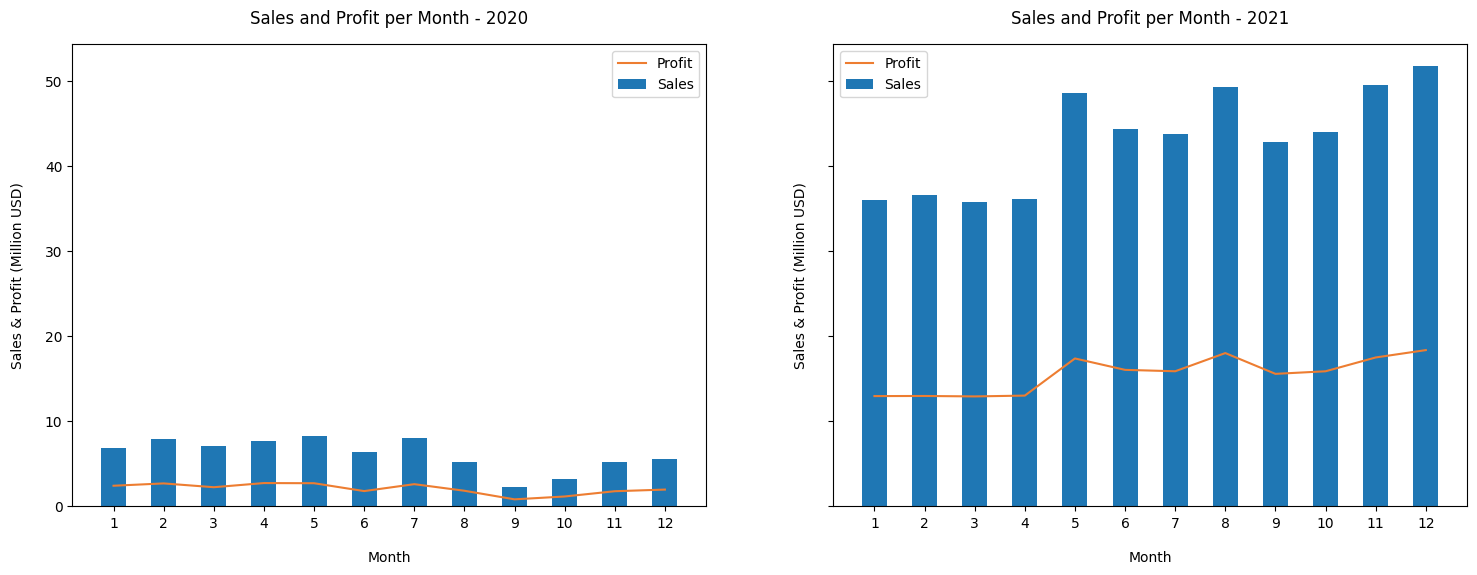

In [ ]:
sales_profit = (adidas.groupby(['Year', 'Month'])[['Total Sales', 'Operating Profit']].sum() / 1000000).reset_index()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

# Biểu đồ Bar cho mỗi năm
for i, year in enumerate([2020, 2021]):
    ax = axs[i]
    ax.bar(sales_profit[sales_profit['Year'] == year]['Month'],
           sales_profit[sales_profit['Year'] == year]['Total Sales'], width=0.5, label='Sales')
    ax.plot(sales_profit[sales_profit['Year'] == year]['Month'],
            sales_profit[sales_profit['Year'] == year]['Operating Profit'], color='#ED7D31', label='Profit')
    ax.set_title(f'Sales and Profit per Month - {year}', pad=15)
    ax.set_xticks(sales_profit[sales_profit['Year'] == year]['Month'])
    ax.set_xlabel('Month', labelpad=15)
    ax.set_ylabel('Sales & Profit (Million USD)', labelpad=15)
    ax.legend()
plt.show()

In [ ]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(adidas['Total Sales'], adidas['Operating Profit'])
print(f'Hệ số tương quan Pearson: {correlation_coefficient}')

# H0: p >= alpha -> không có mối tương quan
# Ha: p < alpha -> có mối tương quan

# Kiểm tra mức độ tương quan và ý nghĩa thống kê
if p_value < 0.05:
    print('Bác bỏ H0 => Có mối tương quan giữa doanh thu và lợi nhuận.')
else:
    print('Châp nhận H0 => Không đủ bằng chứng để bác bỏ giả thuyết không có mối tương quan.')


Hệ số tương quan Pearson: 0.9832880218719213
Bác bỏ H0 => Có mối tương quan giữa doanh thu và lợi nhuận.


#### Doanh thu theo mùa

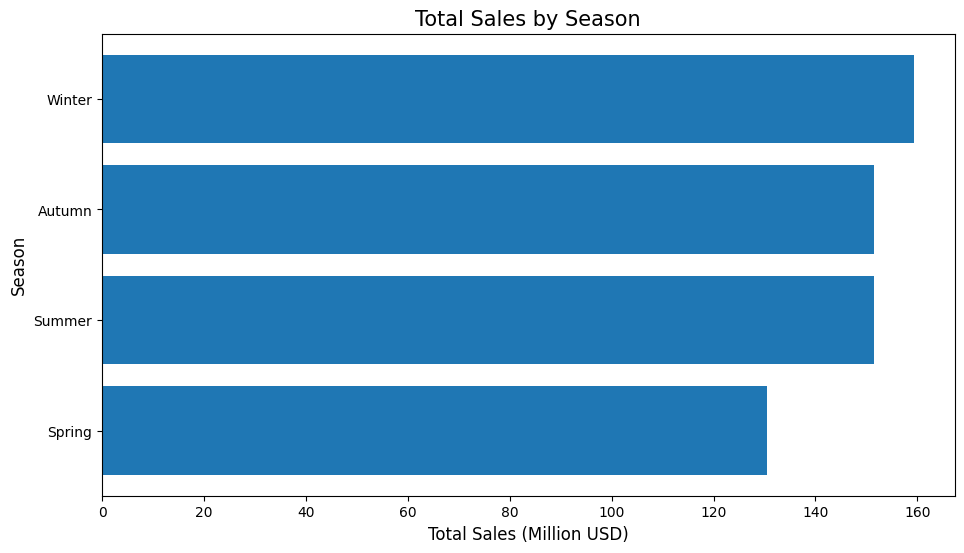

In [ ]:
#tạo mùa
def season(x):
    if x in [1,2,3]: return 'Spring'
    if x in [4,5,6]: return 'Summer'
    if x in [7,8,9]: return 'Autumn'
    if x in [10,11,12]: return 'Winter'
    return x
adidas['Season']=adidas['Month'].apply(season)
sales_by_season = (adidas.groupby('Season')['Total Sales'].sum()/1000000).sort_values()
plt.figure(figsize=(11,6))
# Vẽ biểu đồ thanh ngang
plt.barh(sales_by_season.index, sales_by_season.values)
plt.xlabel('Total Sales (Million USD)', size = 12)
plt.ylabel('Season', size = 12)
plt.title('Total Sales by Season', size = 15)
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

Từ đó có thể thấy rằng Adidas đang làm khá tốt với việc duy trì sự ổn định trong mô hình kinh doanh của mình. Các chiến lược kinh doanh đã đạt hiệu quả và duy trì được sự quan tâm của khách hàng đối với sản phẩm trong suốt cả năm. Kết hợp với biểu đồ doanh thu từng tháng, có thể thấy không có quá nhiều sự khác biệt rõ rệt về doanh thu theo thời gian.

In [ ]:
#kiểm định điều kiện phương sai bằng Levene
spring=adidas[adidas['Season']=='Spring']['Total Sales']
summer=adidas[adidas['Season']=='Summer']['Total Sales']
autumn=adidas[adidas['Season']=='Autumn']['Total Sales']
winter=adidas[adidas['Season']=='Winter']['Total Sales']

# H0: phương sai giữa các nhóm giống nhau
# Ha: phương sai giữa các nhóm khác nhau

levene,p = stats.levene(spring,summer,autumn,winter)
print(f'Trị thống kê Levene = {levene:4f}; p = {p}')
if (p < alpha):
    print(f'*Trị số P = {p} < {alpha} cho nên bác bỏ H0' )
else:
    print(f'* Trị số p = {p} >= {alpha} cho nên KHÔNG bác bỏ H0 ')

Trị thống kê Levene = 9.631948; p = 2.4063860855642114e-06
*Trị số P = 2.4063860855642114e-06 < 0.05 cho nên bác bỏ H0


In [ ]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=0d780d138402db701ec7357cb037ee359cdf6299be6848ab2334a745fc4bcc95
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
#kiểm định Welch vì phương sai không bằng nhau
from pingouin import welch_anova
check = welch_anova(data=adidas, dv='Total Sales', between='Season')

print(check)
# giả thuyết:
# H0: không có sự khác biệt về doanh thu giữa các mùa
# Ha: có sự khác biệt về doanh thu giữa các mùa

# Kiểm tra xem p-value có dưới ngưỡng ý nghĩa alpha hay không
if check['p-unc'][0] < 0.05:
    print("có sự khác biệt về doanh thu giữa các mùa'")
else:
    print("Không có có sự khác biệt về doanh thu giữa các mùa'")

   Source  ddof1        ddof2          F         p-unc       np2
0  Season      3  4997.030488  12.519784  3.745037e-08  0.003535
có sự khác biệt về doanh thu giữa các mùa'


#### Doanh thu theo các nhà bán lẻ.

Text(0, 0.5, 'Total Sales (Million USD)')

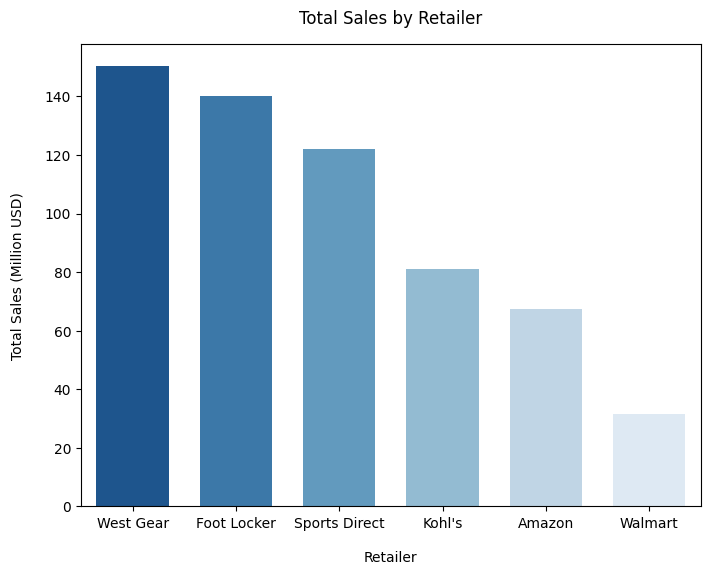

In [ ]:
plt.figure(figsize=(8, 6))
profit_retailer = (adidas.groupby('Retailer')['Total Sales'].sum()/1000000).sort_values(ascending=False).reset_index()
sns.barplot(data=profit_retailer,x='Retailer',y='Total Sales',palette='Blues_r',width=0.7)
plt.title('Total Sales by Retailer', pad=15)
plt.xlabel('Retailer',labelpad=15)
plt.ylabel('Total Sales (Million USD)',labelpad=15)

#### Doanh thu của các nhà bán lẻ theo phương thức bán hàng.

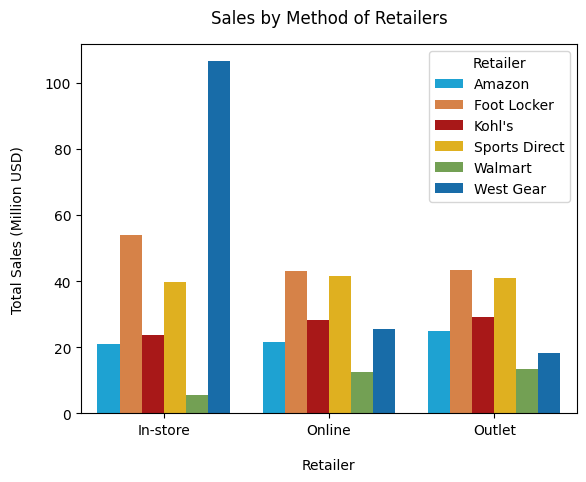

In [ ]:
#Doanh thu theo phương thức bán hàng của các nhà bán lẻ
retailer_sales = (adidas.groupby(['Retailer','Sales Method'])['Total Sales'].sum()/1000000).reset_index()
color = {'Amazon': '#00B0F0', 'Foot Locker': '#ED7D31',
         "Kohl's": '#C00000','Sports Direct':'#FFC000','Walmart':'#70AD47','West Gear':'#0070C0'}
sns.barplot(data=retailer_sales,y='Total Sales',x='Sales Method',hue='Retailer',palette=color)
plt.xlabel('Retailer', labelpad=15)
plt.ylabel('Total Sales (Million USD)', labelpad=15)
plt.title('Sales by Method of Retailers', pad = 15)
plt.show()


Từ biểu đồ trên ta có thể kết luận rằng:
-	Doanh thu tại cửa hàng (In - store): West Gear là nhà phân phối mang lại doanh thu cao nhất trong phương thức này. Điều này chỉ ra rằng chuỗi cửa hàng West Gear thu hút một lượng lớn khách hàng.
-	Bán hàng trực tuyến (Online): Có thể thấy doanh thu ở phương thức này chưa thực sự ấn tượng đối với tất cả nhà phân phối. Mặc dù trên phần trực quan biến định danh ta thấy được đa phần các nhà bán lẻ thường mua online là nhiều nhất, nhưng phần này ta thấy doanh thu ở phương thức online không phải là cao nhất. Điều này có thể hiểu là vì các mặt hàng tại Adidas là thời trang thể thao, nên khách hàng sẽ đề cao việc trải nghiệm thử sản phẩm tại cửa hàng, đa phần các đơn hàng online sẽ mua số lượng ít hoặc các sản phẩm giá thành thấp nên doanh thu sẽ thấp, mặc dù khách hàng đông.

-	Bán hàng tại các cửa hàng giảm giá (Outlet): Đây cũng là phương thức bán hàng phổ biến tại Mỹ, thường xuyên diễn ra của các mặt hàng thời trang thể thao. Bán hàng tại các cửa hàng Outlet sẽ giải quyết được các vấn đề về hàng tồn kho nhưng vẫn đem đến trải nghiệm tốt cho khách hàng khi sản phẩm bán ra với giá ưu đãi cao nhưng chất lượng vẫn tốt hoặc chỉ có lỗi nhỏ.


#### Doanh thu theo khu vực

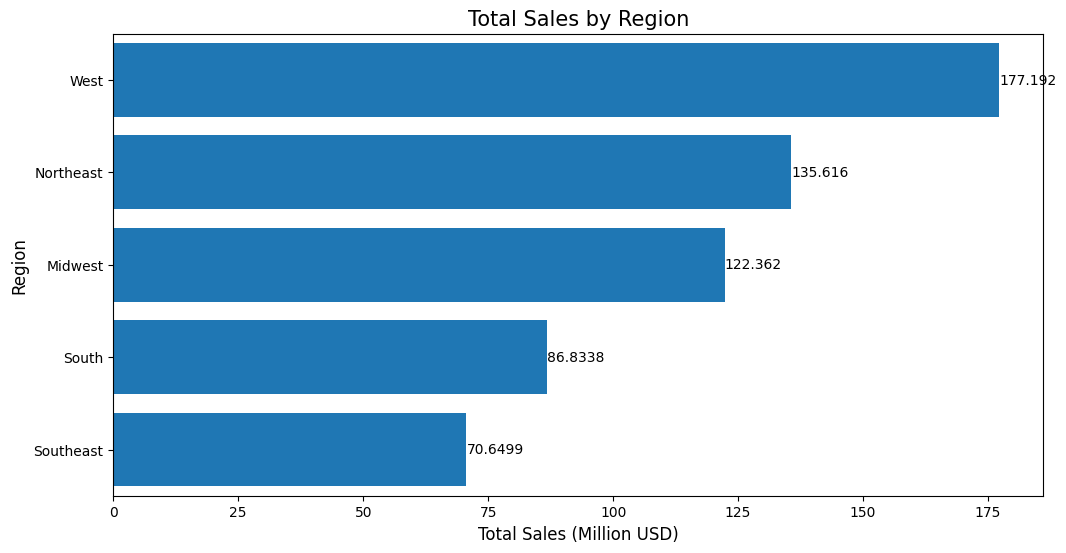

In [ ]:
plt.figure(figsize=(12,6))
# Doanh thu theo khu vuc
sales_by_region=(adidas.groupby('Region')['Total Sales'].sum()/1000000).sort_values()
labels=adidas['Region'].unique()
ax=sales_by_region.plot.barh(color='g',alpha=0.6)
bar_container= ax.barh(labels, sales_by_region)
ax.bar_label(bar_container,fontsize = 10,label_type='edge')
plt.title('Total Sales by Region', size = 15)
plt.xlabel('Total Sales (Million USD)', size = 12)
plt.ylabel('Region', size = 12)
plt.show()


Theo biểu đồ trên ta có thể nhận thấy rằng doanh thu ở miền Tây và Đông Bắc là cao nhất, điều này dễ dàng hiểu vì đây là nơi tập trung của các thành phố lớn, đông đúc dân cư và là trung tâm mua sắm sầm uất bậc nhất nước Mỹ như: Las Vegas, Manchester, Los Angeles,... nền kinh tế phát triển, đa dạng về dân số và nhu cầu mua sắm nên doanh thu ở các vùng này cũng dẫn đầu.

In [ ]:
print(adidas.head())

         Retailer     Region     State      City  Price per Unit  Units Sold  \
70  Sports Direct  Northeast  New York  New York            35.0         700   
71  Sports Direct  Northeast  New York  New York            35.0         700   
72  Sports Direct      South     Texas   Houston            40.0         550   
73  Sports Direct      South     Texas   Houston            35.0         700   
76  Sports Direct      South     Texas   Houston            35.0         675   

    Total Sales  Operating Profit  Operating Margin Sales Method Month  Year  \
70     245000.0          85750.00              0.35       Outlet     7  2020   
71     245000.0          97275.52              0.45       Outlet     7  2020   
72     220000.0          66000.00              0.30       Outlet     7  2020   
73     245000.0          97275.52              0.50       Outlet     7  2020   
76     236250.0          82687.50              0.35       Outlet     7  2020   

   Gender            Product1  Log Tot